In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [19]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=8, batch_size=32, validation_split=0.1)

Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9782 - loss: 0.0709 - val_accuracy: 0.9712 - val_loss: 0.1024
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9840 - loss: 0.0491 - val_accuracy: 0.9802 - val_loss: 0.0724
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9876 - loss: 0.0403 - val_accuracy: 0.9783 - val_loss: 0.0805
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9891 - loss: 0.0326 - val_accuracy: 0.9783 - val_loss: 0.0795
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.9760 - val_loss: 0.0920
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9928 - loss: 0.0246 - val_accuracy: 0.9795 - val_loss: 0.0874
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9946 - loss: 0.0169 - val_accuracy: 0.9788 - val_loss: 0.1004
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9935 - loss: 0.0194 - val_accu

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9701 - loss: 0.1009 
Test Accuracy: 0.9744


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


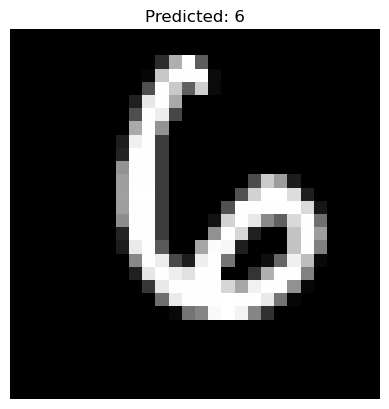

In [15]:
import numpy as np

sample_index = 88
sample_image = x_test[sample_index]
prediction = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(prediction)

plt.imshow(sample_image, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8596 - loss: 0.4594 - val_accuracy: 0.9622 - val_loss: 0.1243
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9664 - loss: 0.1124 - val_accuracy: 0.9698 - val_loss: 0.1004
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9775 - loss: 0.0728 - val_accuracy: 0.9770 - val_loss: 0.0837
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9836 - loss: 0.0520 - val_accuracy: 0.9733 - val_loss: 0.0905
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0421 - val_accuracy: 0.9758 - val_loss: 0.0891
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9673 - loss: 0.1104 
Test Accuracy: 0.9719


NameError: name 'history' is not defined

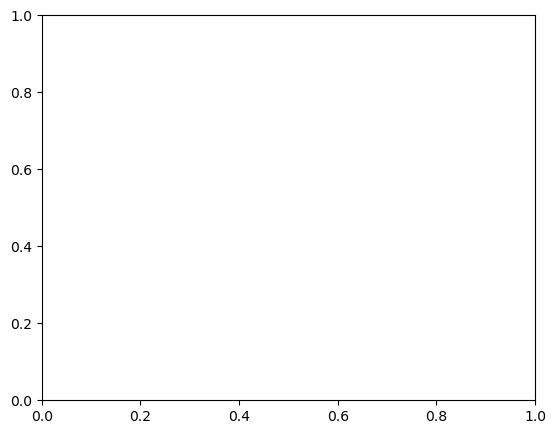

In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalize the pixel values (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3. One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 4. Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 784 vector
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (0–9)
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# 7. Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()